In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.metrics import plot_confusion_matrix,classification_report
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
from matplotlib.colors import ListedColormap
import pandas as pd
import nltk
import re

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/df-1 (1) (2).csv',encoding =('ISO-8859-1')) 

In [ ]:
def resizeplot(x,y,d):
    plt.figure(figsize=(x,y),dpi=d)

In [ ]:
df.head()

,Reviews,Level,Sentiment
0,Make a version of dark theme,Mobile banking,Neutral
1,I can easily make my urgent transactions using...,Mobile banking,Positive
2,My Sister Going through Tough time Collecting ...,Commercial Banking,Negative
3,"This app is very disappointed for me, coz maxi...",Mobile banking,Negative
4,Would you please give me the details of the ho...,Commercial Banking,Neutral


In [ ]:
df.head(10)

,Reviews,Level,Sentiment
0,Make a version of dark theme,Mobile banking,Neutral
1,I can easily make my urgent transactions using...,Mobile banking,Positive
2,My Sister Going through Tough time Collecting ...,Commercial Banking,Negative
3,"This app is very disappointed for me, coz maxi...",Mobile banking,Negative
4,Would you please give me the details of the ho...,Commercial Banking,Neutral
5,"While entering pin,it says wrong..but i tried ...",Mobile banking,Negative
6,Didn't receive enough information to verify debt,Commercial Banking,Negative
7,One can easily pay the utility bill and variou...,Commercial Banking,Positive
8,No good App,Mobile banking,Negative
9,So irritating.. Apps open hoi na.. Onek din dh...,Mobile banking,Positive


# Data **Preprocessing**

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree


In [ ]:
#storing the puntuation free text
df['clean_review']= df['Reviews'].apply(lambda x:remove_punctuation(str(x)))
df.head(10)

,Reviews,Level,Sentiment,clean_review
0,Make a version of dark theme,Mobile banking,Neutral,Make a version of dark theme
1,I can easily make my urgent transactions using...,Mobile banking,Positive,I can easily make my urgent transactions using...
2,My Sister Going through Tough time Collecting ...,Commercial Banking,Negative,My Sister Going through Tough time Collecting ...
3,"This app is very disappointed for me, coz maxi...",Mobile banking,Negative,This app is very disappointed for me coz maxim...
4,Would you please give me the details of the ho...,Commercial Banking,Neutral,Would you please give me the details of the ho...
5,"While entering pin,it says wrong..but i tried ...",Mobile banking,Negative,While entering pinit says wrongbut i tried 247...
6,Didn't receive enough information to verify debt,Commercial Banking,Negative,Didnt receive enough information to verify debt
7,One can easily pay the utility bill and variou...,Commercial Banking,Positive,One can easily pay the utility bill and variou...
8,No good App,Mobile banking,Negative,No good App
9,So irritating.. Apps open hoi na.. Onek din dh...,Mobile banking,Positive,So irritating Apps open hoi na Onek din dhora ...


In [ ]:
df['clean_review']= df['clean_review'].apply(lambda x: x.lower())

In [ ]:
df.head(10)

,Reviews,Level,Sentiment,clean_review
0,Make a version of dark theme,Mobile banking,Neutral,make a version of dark theme
1,I can easily make my urgent transactions using...,Mobile banking,Positive,i can easily make my urgent transactions using...
2,My Sister Going through Tough time Collecting ...,Commercial Banking,Negative,my sister going through tough time collecting ...
3,"This app is very disappointed for me, coz maxi...",Mobile banking,Negative,this app is very disappointed for me coz maxim...
4,Would you please give me the details of the ho...,Commercial Banking,Neutral,would you please give me the details of the ho...
5,"While entering pin,it says wrong..but i tried ...",Mobile banking,Negative,while entering pinit says wrongbut i tried 247...
6,Didn't receive enough information to verify debt,Commercial Banking,Negative,didnt receive enough information to verify debt
7,One can easily pay the utility bill and variou...,Commercial Banking,Positive,one can easily pay the utility bill and variou...
8,No good App,Mobile banking,Negative,no good app
9,So irritating.. Apps open hoi na.. Onek din dh...,Mobile banking,Positive,so irritating apps open hoi na onek din dhora ...


In [ ]:
import re
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens
#applying function to the column
df['clean_review']= df['clean_review'].apply(lambda x: tokenization(x))

In [ ]:
df.head(10)

,Reviews,Level,Sentiment,clean_review
0,Make a version of dark theme,Mobile banking,Neutral,[make a version of dark theme]
1,I can easily make my urgent transactions using...,Mobile banking,Positive,[i can easily make my urgent transactions usin...
2,My Sister Going through Tough time Collecting ...,Commercial Banking,Negative,[my sister going through tough time collecting...
3,"This app is very disappointed for me, coz maxi...",Mobile banking,Negative,[this app is very disappointed for me coz maxi...
4,Would you please give me the details of the ho...,Commercial Banking,Neutral,[would you please give me the details of the h...
5,"While entering pin,it says wrong..but i tried ...",Mobile banking,Negative,[while entering pinit says wrongbut i tried 24...
6,Didn't receive enough information to verify debt,Commercial Banking,Negative,[didnt receive enough information to verify debt]
7,One can easily pay the utility bill and variou...,Commercial Banking,Positive,[one can easily pay the utility bill and vario...
8,No good App,Mobile banking,Negative,[no good app]
9,So irritating.. Apps open hoi na.. Onek din dh...,Mobile banking,Positive,[so irritating apps open hoi na onek din dhora...


In [ ]:
#importing nlp library
import nltk
nltk.download('stopwords')
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [ ]:
#applying the function
df['clean_review']= df['clean_review'].apply(lambda x:remove_stopwords(x))
df.head(10)

,Reviews,Level,Sentiment,clean_review
0,Make a version of dark theme,Mobile banking,Neutral,[make a version of dark theme]
1,I can easily make my urgent transactions using...,Mobile banking,Positive,[i can easily make my urgent transactions usin...
2,My Sister Going through Tough time Collecting ...,Commercial Banking,Negative,[my sister going through tough time collecting...
3,"This app is very disappointed for me, coz maxi...",Mobile banking,Negative,[this app is very disappointed for me coz maxi...
4,Would you please give me the details of the ho...,Commercial Banking,Neutral,[would you please give me the details of the h...
5,"While entering pin,it says wrong..but i tried ...",Mobile banking,Negative,[while entering pinit says wrongbut i tried 24...
6,Didn't receive enough information to verify debt,Commercial Banking,Negative,[didnt receive enough information to verify debt]
7,One can easily pay the utility bill and variou...,Commercial Banking,Positive,[one can easily pay the utility bill and vario...
8,No good App,Mobile banking,Negative,[no good app]
9,So irritating.. Apps open hoi na.. Onek din dh...,Mobile banking,Positive,[so irritating apps open hoi na onek din dhora...


In [ ]:
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()

In [ ]:
#defining a function for stemming
def stemming(text):
  stem_text = [porter_stemmer.stem(word) for word in text]
  return stem_text


In [ ]:
df['clean_review']=df['clean_review'].apply(lambda x: stemming(x))

In [ ]:
df.head(10)

,Reviews,Level,Sentiment,clean_review
0,Make a version of dark theme,Mobile banking,Neutral,[make a version of dark them]
1,I can easily make my urgent transactions using...,Mobile banking,Positive,[i can easily make my urgent transactions usin...
2,My Sister Going through Tough time Collecting ...,Commercial Banking,Negative,[my sister going through tough time collecting...
3,"This app is very disappointed for me, coz maxi...",Mobile banking,Negative,[this app is very disappointed for me coz maxi...
4,Would you please give me the details of the ho...,Commercial Banking,Neutral,[would you please give me the details of the h...
5,"While entering pin,it says wrong..but i tried ...",Mobile banking,Negative,[while entering pinit says wrongbut i tried 24...
6,Didn't receive enough information to verify debt,Commercial Banking,Negative,[didnt receive enough information to verify debt]
7,One can easily pay the utility bill and variou...,Commercial Banking,Positive,[one can easily pay the utility bill and vario...
8,No good App,Mobile banking,Negative,[no good app]
9,So irritating.. Apps open hoi na.. Onek din dh...,Mobile banking,Positive,[so irritating apps open hoi na onek din dhora...


In [ ]:
#df['clean_review'].value_counts()

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[information belongs to someone els]                                                                             9422
[reporting company used your report improperli]                                                                  8132
[good]                                                                                                           6565
[nice]                                                                                                           6007
[nice app]                                                                                                       5137
                                                                                                                 ... 
[great ã°å¸ëâ]                                                                                                    1
[bkasu]                                                                                                             1
[if the rewards from bikash are complete why cant it be 

# **OverSampling**

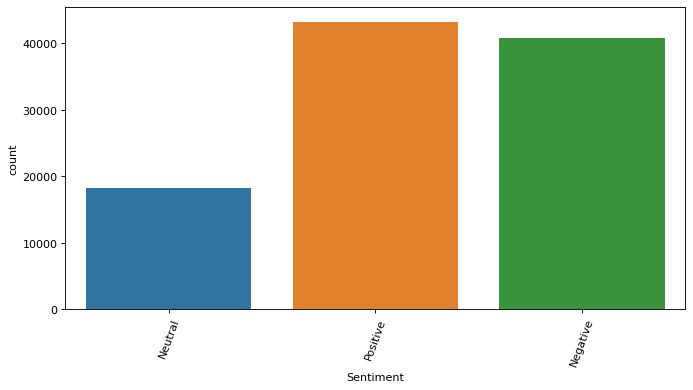

In [ ]:
resizeplot(10,5,80)
plt.xticks(rotation=70);
sns.countplot(x='Sentiment',data=df)

In [ ]:
#df['Sentiment'].value_counts()


Negative    45982
Positive    41667
Neutral     14721
Name: Sentiment, dtype: int64

In [ ]:
#X = df['clean_review'].values
#y = df['Sentiment'].values

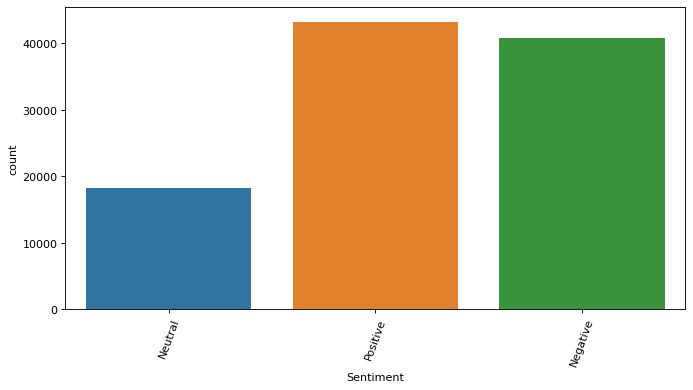

In [ ]:
resizeplot(10,5,80)
plt.xticks(rotation=70);
sns.countplot(x='Sentiment',data=df)

In [ ]:
target_count = df.Sentiment.value_counts()

In [ ]:
print('Negative:', target_count[0])
print('Positive:', target_count[1])
print('Neutral:', target_count[2])

Negative: 43308
Positive: 40858
Neutral: 18194


In [ ]:
Negative, Positive, Neutral = df.Sentiment.value_counts()

# Divide by class
df_class_0 = df[df['Sentiment'] == 0]
df_class_1 = df[df['Sentiment'] == 1]
df_class_2 = df[df['Sentiment'] == 2]

In [ ]:
print('df_class 0:', df_class_0.shape)
print('df_class 1:', df_class_1.shape)
print('df_class 2:',df_class_2.shape)

df_class 0: (0, 4)
df_class 1: (0, 4)
df_class 2: (0, 4)


In [ ]:
#df_class_1_over = df_class_1.sample(Negative, replace=True)
#df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

#print('Random over-sampling:')
#print(df_test_over.target.value_counts())

#df_test_over.target.value_counts().plot(kind='bar', title='Count (target)');

ValueError: ignored

# Vectorization

In [ ]:
X = df['clean_review']
Y=df['Sentiment']
Z=df['Level']

In [ ]:
X = X.astype(str)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(X).toarray()

In [ ]:
sentence_1="Make a version of dark theme"
sentence_2="I can easily make my urgent transactions using bKash app. Thanks to all the members of bKash team."

In [ ]:
CountVec = CountVectorizer(ngram_range=(1,1), # to use bigrams ngram_range=(2,2)
                           stop_words='english')

In [ ]:
Count_data = CountVec.fit_transform([sentence_1,sentence_2])

In [ ]:
cv_dataframe=pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names())
print(cv_dataframe)

   app  bkash  dark  easily  make  members  team  thanks  theme  transactions  \
0    0      0     1       0     1        0     0       0      1             0   
1    1      2     0       1     1        1     1       1      0             1   

   urgent  using  version  
0       0      0        1  
1       1      1        0  


In [ ]:
X=X.astype(str)

In [ ]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#cv = TfidfVectorizer()
#X = cv.fit_transform(X).toarray()

In [ ]:
#df.isnull().sum()

Reviews         487
Level             0
Sentiment         0
clean_review      0
dtype: int64

In [ ]:
#df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102370 entries, 0 to 102369
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Reviews       101883 non-null  object
 1   Level         102370 non-null  object
 2   Sentiment     102370 non-null  object
 3   clean_review  102370 non-null  object
dtypes: object(4)
memory usage: 3.1+ MB


In [ ]:
#imputer = KNNImputer(missing_values=float ,n_neighbors=5,metric='nan_euclidian',weights='uniform')

In [ ]:
#df.columns

In [ ]:
#df['clean_review'].fillna('unknown',inplace=True)

In [ ]:
#df['Sentiment'].unique()

In [ ]:
#df['Sentiment'].fillna('unknown',inplace=True)

In [ ]:
#X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
df['Sentiment'].value_counts()

Positive    43308
Negative    40858
Neutral     18194
Name: Sentiment, dtype: int64

In [ ]:
df.isnull().sum()

Reviews         466
Level             0
Sentiment         0
clean_review      0
dtype: int64

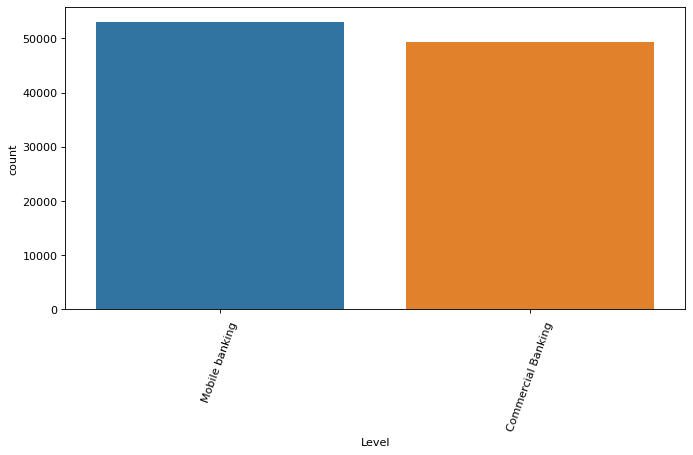

In [ ]:
resizeplot(10,5,80)
plt.xticks(rotation=70);
sns.countplot(x='Level',data=df)

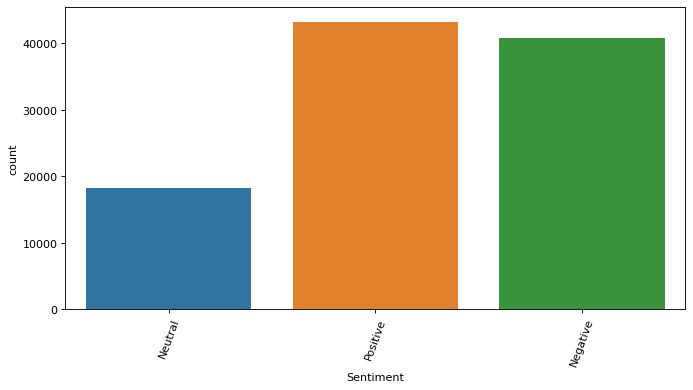

In [ ]:
resizeplot(10,5,80)
plt.xticks(rotation=70);
sns.countplot(x='Sentiment',data=df)

In [ ]:
df.groupby('Sentiment').describe().transpose()

In [ ]:
pd.DataFrame(df[['Sentiment','Level']].value_counts(),columns=['rated'])

,,rated
Sentiment,Level,
Negative,Commercial Banking,39191
Positive,Mobile banking,37008
Neutral,Mobile banking,14403
Positive,Commercial Banking,6300
Neutral,Commercial Banking,3791
Negative,Mobile banking,1667


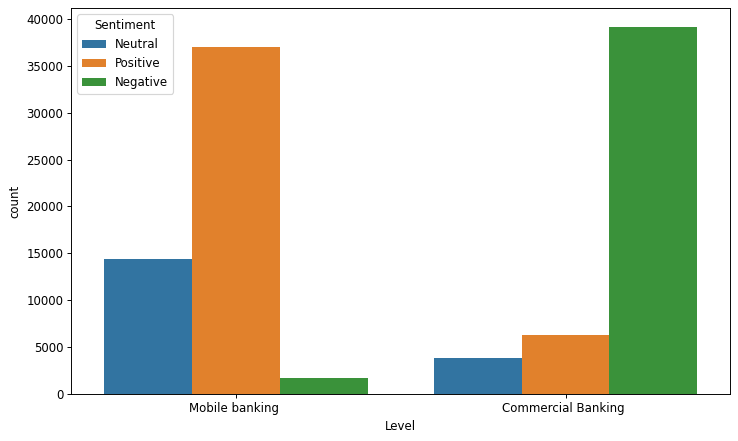

In [ ]:
resizeplot(10,6,85)
sns.countplot(x='Level',hue='Sentiment',data=df)

In [ ]:
#data = df[['Sentiment','clean_review']]

In [ ]:
#data

In [ ]:

#y = df['Sentiment']

In [ ]:
#X = X.astype(str)

In [ ]:
X_train, X_test, z_train, z_test = train_test_split(X, Z, test_size=0.3, random_state=30) 

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
X, Y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=27)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=27)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=30)

Transaction Number x_train dataset:  (700, 20)
Transaction Number y_train dataset:  (700,)
Transaction Number x_test dataset:  (300, 20)
Transaction Number y_test dataset:  (300,)
Before OverSampling, counts of label '0': 336
Before OverSampling, counts of label '1': 364 

Before OverSampling, counts of label '2': 0 

After OverSampling, the shape of train_x: (728, 20)
After OverSampling, the shape of train_y: (728,) 

After OverSampling, counts of label '0', %: 50.0
After OverSampling, counts of label '1', %: 50.0
After OverSampling, counts of label '2', %: 0.0


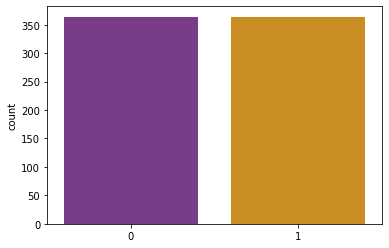

In [ ]:
from imblearn.over_sampling import SMOTE

print("Transaction Number x_train dataset: ", X_train.shape)
print("Transaction Number y_train dataset: ", y_train.shape)
print("Transaction Number x_test dataset: ", X_test.shape)
print("Transaction Number y_test dataset: ", y_test.shape)

print("Before OverSampling, counts of label '0': {}".format(sum(y_train==0)))
print("Before OverSampling, counts of label '1': {} \n".format(sum(y_train==1)))
print("Before OverSampling, counts of label '2': {} \n".format(sum(y_train==2)))
sm = SMOTE(random_state=3)
X_train_s, y_train_s = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_x: {}'.format(X_train_s.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_s.shape))

print("After OverSampling, counts of label '0', %: {}".format(sum(y_train_s==0)/len(y_train_s)*100.0,3))
print("After OverSampling, counts of label '1', %: {}".format(sum(y_train_s==1)/len(y_train_s)*100.0,3))
print("After OverSampling, counts of label '2', %: {}".format(sum(y_train_s==2)/len(y_train_s)*100.0,3))
sns.countplot(x=y_train_s, data=df, palette='CMRmap')

AttributeError: ignored

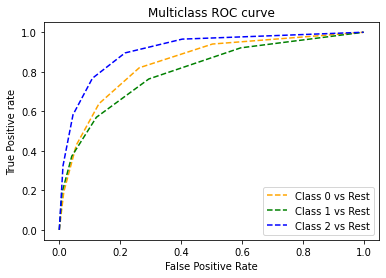

In [ ]:

# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate 2 class dataset
X, Y = make_classification(n_samples=100000, n_classes=3, n_features=20, n_informative=3, random_state=42)

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

# fit model
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  
# logistic regression
model1 = SVC()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)
#model3= MultinomialNB()

# fit model
model1.fit(X_train_s, y_train_s)
model2.fit(X_train_s, y_train_s)
#model3.fit(X_train_s, y_train_s)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
#pred_prob3 = model3.predict_proba(X_test)

In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
#fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
#auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])

print(auc_score1, auc_score2)

0.9763719512195123 0.9246323529411766


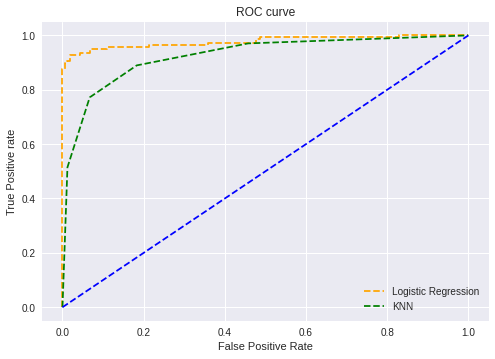

In [ ]:

# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='SVM')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
#X_train_tfid 

NameError: ignored

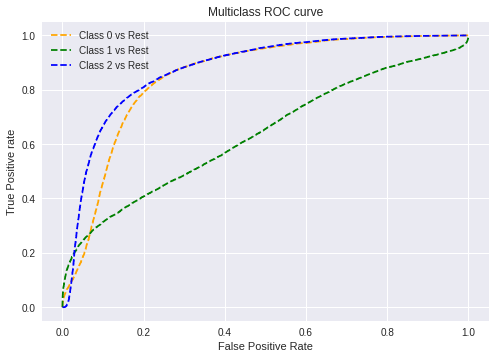

In [ ]:
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate 2 class dataset
X, Y = make_classification(n_samples=100000, n_classes=3, n_features=20, n_informative=3, random_state=42)

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

# fit model
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

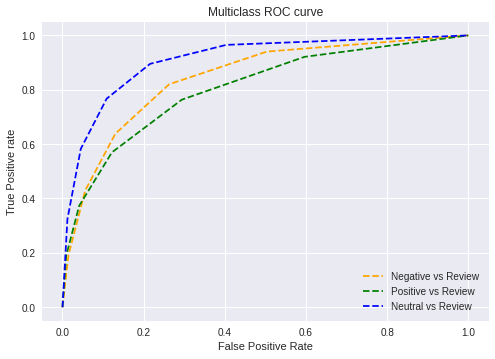

In [ ]:
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate 2 class dataset
X, Y = make_classification(n_samples=100000, n_classes=3, n_features=20, n_informative=3, random_state=42)

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

# fit model
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Negative vs Review')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Positive vs Review')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Neutral vs Review')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  


In [ ]:
def report(model):
    preds =model.predict(X_test)
    #print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test,y_test) 

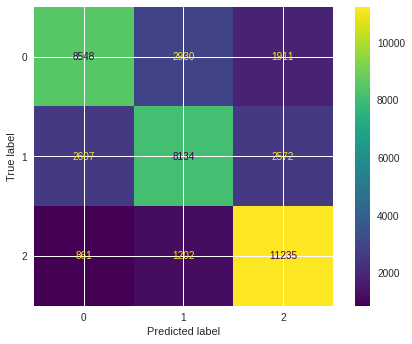

In [ ]:
report(clf)

In [ ]:
from sklearn import svm, datasets
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate 2 class dataset
X, Y = make_classification(n_samples=100000, n_classes=3, n_features=20, n_informative=3, random_state=42)

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

# fit model
clf = OneVsRestClassifier(svm())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

In [ ]:
#X_train = X_train.astype(str)

In [ ]:
#tfid = TfidfVectorizer(stop_words='english')

#tfid.fit(X_train)

#X_train = tfid.transform(X_train_s)
#X_test = tfid.transform(X_test)

AttributeError: ignored

In [ ]:
#MULTINOMIAL NB
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_s,y_train_s)

MultinomialNB()

In [ ]:
Y_gnb_score = nb.predict_proba(X_test)

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle


# Binarize the output
y = label_binarize(Y, classes=[0, 1, 2])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.5, random_state=0)

classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=100))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

IndexError: ignored

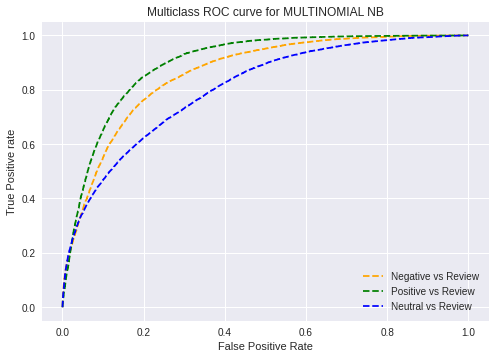

In [ ]:
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate 2 class dataset
X, y = make_classification(n_samples=100000, n_classes=3, n_features=11, n_informative=3, random_state=100)

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# fit model
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Negative vs Review')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Positive vs Review')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Neutral vs Review')
plt.title('Multiclass ROC curve for MULTINOMIAL NB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);   

In [ ]:
encoder = OrdinalEncoder()
data_encoded = encoder.fit_transform(df["clean_review"])
car_df_encoded = pd.DataFrame(data_encoded, columns=features)
encoder = LabelEncoder()
target_encoded = encoder.fit_transform(car_df['class'])
car_df_encoded['class'] = target_encoded

In [ ]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

#predicting the data
y_pred_cnb = nb.predict(X_test)
y_prob_pred_cnb = nb.predict_proba(X_test)

#roc auc score
roc_auc_score(y_test, y_prob_pred_cnb, multi_class='ovo', average='weighted')

0.9178010909354503

In [ ]:
#LOGISTIC REGRESSION

#lr = LogisticRegression(solver='saga',multi_class='ovr',max_iter = 1000)
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train_s,y_train_s)

#penalty = ['l1','l2']
#l1_ratio = np.linspace(0,10)
#C = np.logspace(0,10)

#param_grid_lr = {'penalty':penalty,'l1_ratio':l1_ratio,'C':C}

#grid_model = GridSearchCV(lr,param_grid=param_grid_lr,cv=2,verbose=2,n_jobs=-1)

LogisticRegression(max_iter=1000)

In [ ]:
#grid_model.fit(X_train_tfid,y_train)
#lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
#SVC

svc = SVC()

svc.fit(X_train,y_train)

#penalty_svc = ['l1','l2']
#C_svc = np.logspace(0,10)
#param_grid_svc = {'penalty':penalty_svc,'loss':['hinge', 'squared_hinge'],
                  #'C'=C_svc,'multi_class':['ovr'],
                  #'max_iter':[1000] }

#grid_model_svc = GridSearchCV(rbf_svc,param_grid=param_grid_svc,cv=2,verbose=2,n_jobs=-1)

SVC()

In [ ]:
#DECISION TREE

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
#METRICS FUNCTION

def report(model):
    preds =model.predict(X_test)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test,y_test)

              precision    recall  f1-score   support

    Negative       0.83      0.96      0.89     12208
     Neutral       0.94      0.46      0.62      5545
    Positive       0.89      0.94      0.91     12955

    accuracy                           0.86     30708
   macro avg       0.88      0.79      0.81     30708
weighted avg       0.87      0.86      0.85     30708



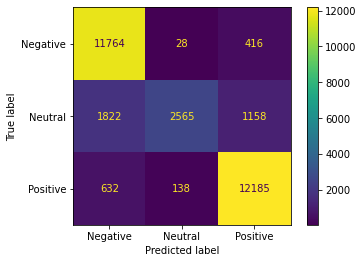

In [ ]:
report(nb)

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = nb.predict_proba(X_test)[:,1]
#fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

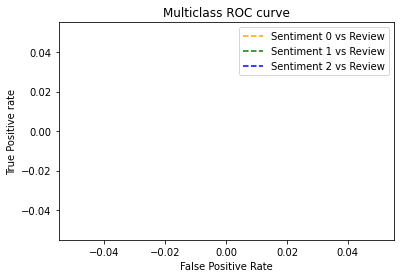

In [ ]:
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred_cnb[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Sentiment 0 vs Review')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Sentiment 1 vs Review')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Sentiment 2 vs Review')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

              precision    recall  f1-score   support

    Negative       0.88      0.98      0.92     12208
     Neutral       0.91      0.79      0.84      5545
    Positive       0.98      0.93      0.96     12955

    accuracy                           0.92     30708
   macro avg       0.92      0.90      0.91     30708
weighted avg       0.93      0.92      0.92     30708



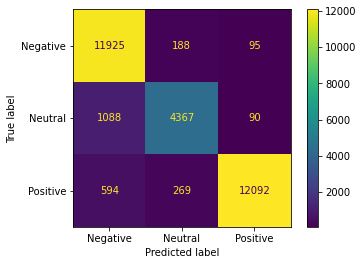

In [ ]:
report(lr)

              precision    recall  f1-score   support

    Negative       0.98      0.98      0.98     13806
     Neutral       0.83      0.96      0.89      4429
    Positive       0.99      0.94      0.97     12476

    accuracy                           0.96     30711
   macro avg       0.93      0.96      0.95     30711
weighted avg       0.96      0.96      0.96     30711



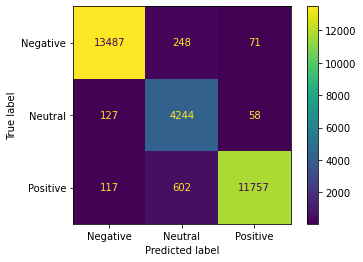

In [ ]:
#SVC MODEL

report(svc)

              precision    recall  f1-score   support

    Negative       0.99      0.98      0.98     11499
     Neutral       0.91      0.94      0.93      3625
    Positive       0.99      0.98      0.98     10469

    accuracy                           0.97     25593
   macro avg       0.96      0.97      0.96     25593
weighted avg       0.98      0.97      0.97     25593



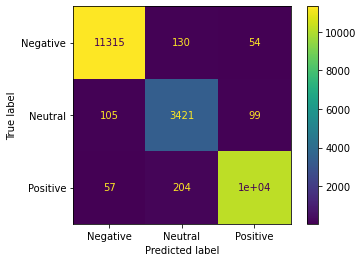

In [ ]:
# DECISION TREE MODEL

report(dt)

In [ ]:
#pipe = Pipeline([('tfid',TfidfVectorizer()),('LR',LogisticRegression())])

In [ ]:
#pipe.fit(X,y)

Pipeline(steps=[('tfid', TfidfVectorizer()), ('LR', LogisticRegression())])

In [ ]:
#pipe.predict(['not a good deal'])

array(['Positive'], dtype=object)

Deep learning KNN

In [ ]:
#data.head()

Mobile and commercial banking classification

In [ ]:
import numpy as np

In [ ]:
#X = X.astype(str)

In [ ]:
X = X.reshape(-1,1)

In [ ]:
#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#X = le.fit_transform(X)

In [ ]:
#X_train = X_train.reshape(-1, 1)
#X_test = X_test.reshape(-1, 1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)
predict = knn.predict(X_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

    Negative       0.88      0.96      0.92     12208
     Neutral       0.82      0.78      0.80      5545
    Positive       0.98      0.91      0.94     12955

    accuracy                           0.91     30708
   macro avg       0.89      0.89      0.89     30708
weighted avg       0.91      0.91      0.91     30708



# **Sentiment analysis**

In [ ]:
#Z = df['Sentiment']

In [ ]:
#X = X.astype(str)

In [ ]:
X = X.reshape(-1,1)

In [ ]:
#import pandas as pd

In [ ]:
#df['clean_review']=df['clean_review'].astype(str)

In [ ]:
#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#df['clean_review'] = le.fit_transform(df['clean_review'])
#Z =le.fit_transform(Z)

In [ ]:
#X = df['Reviews']

In [ ]:
#X = X.astype(str)

In [ ]:
#Y = df['Sentiment']

In [ ]:
 #df['Sentiment'].value_counts()

Negative    45982
Positive    41667
Neutral     14721
Name: Sentiment, dtype: int64

In [ ]:
#Y = cv.fit_transform(Y).toarray()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=50,stratify=y)

ValueError: ignored

In [ ]:
#X_train = X_train.reshape(-1, 1)
#X_test = X_test.reshape(-1, 1)

In [ ]:
#y_train = y_train.reshape(-1, 1)
#y_test = y_test.reshape(-1, 1)

AttributeError: ignored

In [ ]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_s,y_train_s)
predict = knn.predict(X_test)

print(classification_report(y_test,predict))

              precision    recall  f1-score   support

    Negative       1.00      0.97      0.98     13806
     Neutral       0.77      0.98      0.86      4429
    Positive       0.99      0.92      0.96     12476

    accuracy                           0.95     30711
   macro avg       0.92      0.96      0.93     30711
weighted avg       0.96      0.95      0.95     30711



In [ ]:
#METRICS FUNCTION

def report(model):
    preds =model.predict(X_test)
    #print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test,y_test) 

In [ ]:
report(knn)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-e6dde924b31f>", line 1, in <module>
    report(knn)
  File "<ipython-input-31-16bda46b9876>", line 6, in report
    plot_confusion_matrix(model,X_test,y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py", line 88, in wrapped
    return fun(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/confusion_matrix.py", line 565, in plot_confusion_matrix
    y_pred = estimator.predict(X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py", line 214, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py", line 759, in kneighbors
    **kwds,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pa

KeyboardInterrupt: ignored

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [ ]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 98.96593589081623 % and k = [1]


In [ ]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 96.45078310703006 % and k = [5]


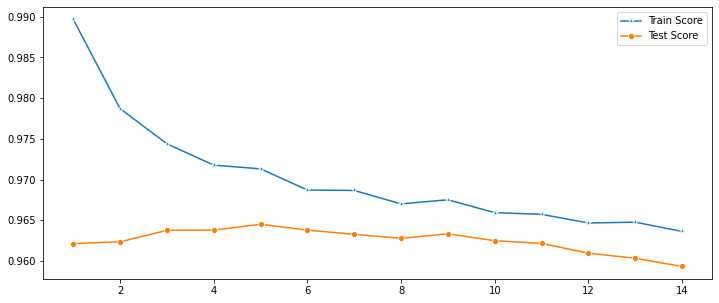

In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

**CNN**


In [ ]:
import tensorflow as tf

In [ ]:
tf.random.set_seed(42)

In [ ]:
X= X.astype(str)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X = le.fit_transform(X)

In [ ]:
Y= Y.astype(str)

In [ ]:
Y = le.fit_transform(Y)

In [ ]:
X = X.reshape(-1, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size = 7/10)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.utils import np_utils
import numpy as np

In [ ]:
X_train = X_train.reshape(-1, 1)

In [ ]:
def baseline_model(X_train, y_train):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(124,activation="relu",input_shape=(16,)))
  model.add(tf.keras.layers.Dense(4))
  model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
  return model

In [ ]:
model = baseline_model(X_train, Y_train)

In [ ]:
model.fit(X_train, Y_train, epochs= 20,batch_size=100, verbose =1)

Epoch 1/20


ValueError: ignored

In [ ]:
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

In [ ]:
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

In [ ]:
model_3.fit(X_train, Y_train, epochs=100)

Epoch 1/100


ValueError: ignored

In [ ]:
# Creating the model
model = Sequential()

In [ ]:
!pip install Adam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras
from keras.optimizers import Adam
import graphviz

ImportError: ignored

In [ ]:
model.add(Dense(18, 
                activation='relu',  
                input_dim=20,
                kernel_initializer='uniform'))

In [ ]:
model.add(Dropout(0.50))

In [ ]:
model.add(Dense(60,
                kernel_initializer='uniform',
                activation='relu'))

In [ ]:
model.add(Dropout(0.50))

In [ ]:
model.add(Dense(1,
                kernel_initializer='uniform',
                activation='sigmoid'))

In [ ]:
model.compile(optimizer = "sigmoid", loss = 'binary_crossentropy', metrics = ['accuracy'])
#optimizers list
#optimizers['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

# Fitting the ANN to the Training set
model.fit(X_train, y_train, 
               batch_size = 60, 
               epochs = 30, verbose=2)

ValueError: ignored

In [ ]:
model = baseline_model(X_train, Y_train)

In [ ]:
import tensorflow as tf

In [ ]:
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])


In [ ]:
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

In [ ]:
model_1.fit(X_train, Y_train, epochs=5)

Epoch 1/5


ValueError: ignored

In [ ]:
!pip install tensorFlow 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 462 kB 5.2 MB/s 


# **ANN**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

import os
# print(os.listdir("../input"))
plt.style.use('ggplot')

In [ ]:
df_yelp = df[df == 'yelp']
sentences = df_yelp['Reviews'].values
y = df_yelp['Sentiment'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [ ]:
vectorizer = CountVectorizer()
sentences_train=sentences_train.astype(str)
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
sentences_test=sentences_test.astype(str)
X_test  = vectorizer.transform(sentences_test)

In [ ]:
X_train

<76776x1 sparse matrix of type '<class 'numpy.int64'>'
	with 76776 stored elements in Compressed Sparse Row format>

In [ ]:
y_train=y_train.astype(str)

In [ ]:
y_train=vectorizer.transform(y_train)

In [ ]:
X_train = np.linspace(0,2*np.pi,80)

In [ ]:
X_train=X_train.reshape(-1,1)

In [ ]:
y_train= np.sin(X_train) + np.random.normal(0,0.4,80)

In [ ]:
y_train = y_train.reshape(-1,1)

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

ValueError: ignored